In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/home/sharan/Desktop/DSC_Verzeo/major project/phase_4' #folder with pictures of indian and non indian in separate folders
CATEGORIES = ['nonIndian', 'indian']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category) #Label encoding the values
    path = os.path.join(DATADIR,category) #create path to use all the images
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1.
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data[0])

print(target)

unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data,target, test_size=0.3, random_state=100)

from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']}
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

print('tested: ',y_test)
print('predicted: ',y_pred)



from sklearn.metrics import accuracy_score,confusion_matrix

print('accuracy: ',accuracy_score(y_pred,y_test))

print('\nconfusion matrix: \n',confusion_matrix(y_pred,y_test))

import pickle

pickle.dump(clf,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))
print('training complete\n')



testing now...

(499, 333, 3)


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

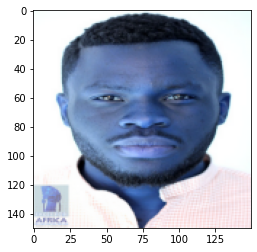

In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

folder = '/home/sharan/Desktop/DSC_Verzeo/major project/phase_4/testData' #folder with pictures to test model 
dest = '/home/sharan/Desktop/DSC_Verzeo/major project/phase_4/predictedIndian' #folder to store indian pictures predicted by model from test data

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images = []
images = load_images(folder)

k=1
print('testing now...\n')
for img in images :
    flat_data = []
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resized)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    if y_out == 'indian' :
        cv2.imwrite(os.path.join( dest , 'image '+str(k)+'.jpg'),img)
        k= k+1

